In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot # This is for Cook's Distance
import statsmodels.formula.api as smf
import seaborn as sns

In [54]:
start = pd.read_csv('50_Startups.csv')
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
start.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace =True)

In [56]:
# One hot encoding the categorical variables
start = pd.get_dummies(start)
start.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [90]:
#Split the Data into X and Y
Y = start[['Profit']]
X = start[['RD_Spend','Administration', 'Marketing_Spend']]

In [91]:
X.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
dtype: int64

In [92]:
Y.isna().sum()

Profit    0
dtype: int64

In [86]:
start.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


## We can see that R&D Spend and Marketing Spend are having 0.724 correlation, Let us check the significance of the input variables.

In [103]:
#Build the Model
model = smf.ols('Y~X', data = start).fit()

In [104]:
# Co-efficients
model.params

Intercept    50122.192990
X[0]             0.805715
X[1]            -0.026816
X[2]             0.027228
dtype: float64

In [105]:
#t-value and P value
print(model.tvalues, '\n', model.pvalues)

(model.rsquared, model.aic, model.rsquared_adj)

Intercept     7.626218
X[0]         17.846374
X[1]         -0.525507
X[2]          1.655077
dtype: float64 
 Intercept    1.057379e-09
X[0]         2.634968e-22
X[1]         6.017551e-01
X[2]         1.047168e-01
dtype: float64


(0.9507459940683246, 1058.7714985998055, 0.9475337762901719)

## R2 value is 0.95. its pretty good, but the Marketing spend and Administration seems to be insignigicant, Lets build a few more models

# Residual Analysis

# Test for Normality of Residuala(Q-Q Plot)

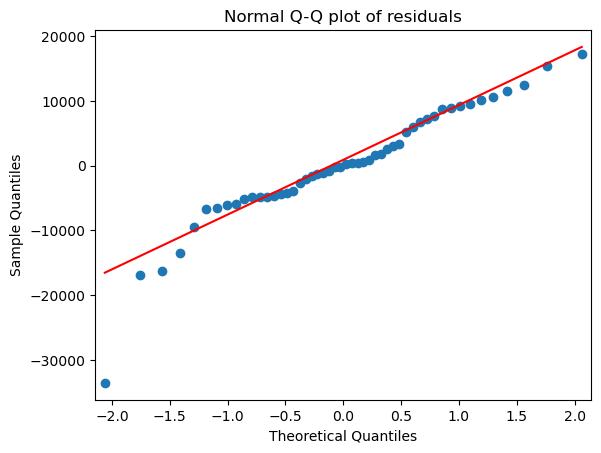

In [98]:
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid,line='q')  # line=q draws 45 degree in the plot
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [100]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual plot for Homosecdasticity

In [101]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

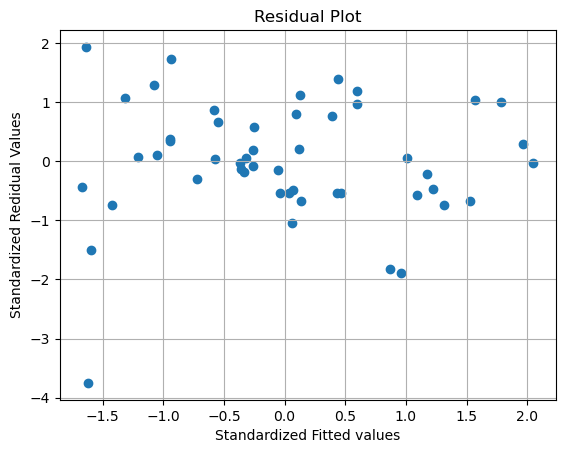

In [102]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted values")
plt.ylabel("Standardized Redidual Values")
plt.grid()
plt.show()

In [64]:
#Build the Model
model1 = smf.ols('Y ~ Administration', data = start).fit()
#t-value and P value
print(model1.tvalues, '\n', model1.pvalues)

(model1.rsquared, model1.aic, model1.rsquared_adj)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


(0.04028714077757223, 1203.2536701858016, 0.020293122877105052)

In [65]:
#Build the Model
model2 = smf.ols('Y ~ Marketing_Spend', data = start).fit()
#t-value and P value
print(model2.tvalues, '\n', model2.pvalues)

(model2.rsquared, model2.aic, model2.rsquared_adj)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


(0.5591535746115515, 1164.3567921009328, 0.5499692740826254)

In [66]:
#Build the Model
model3 = smf.ols('Y ~ RD_Spend ', data = start).fit()
#t-value and P value
print(model3.tvalues, '\n', model3.pvalues)

(model3.rsquared, model3.aic, model3.rsquared_adj)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


(0.9465353160804393, 1058.8730295624773, 0.9454214684987817)

# Residual vs Regressors

eval_env: 1


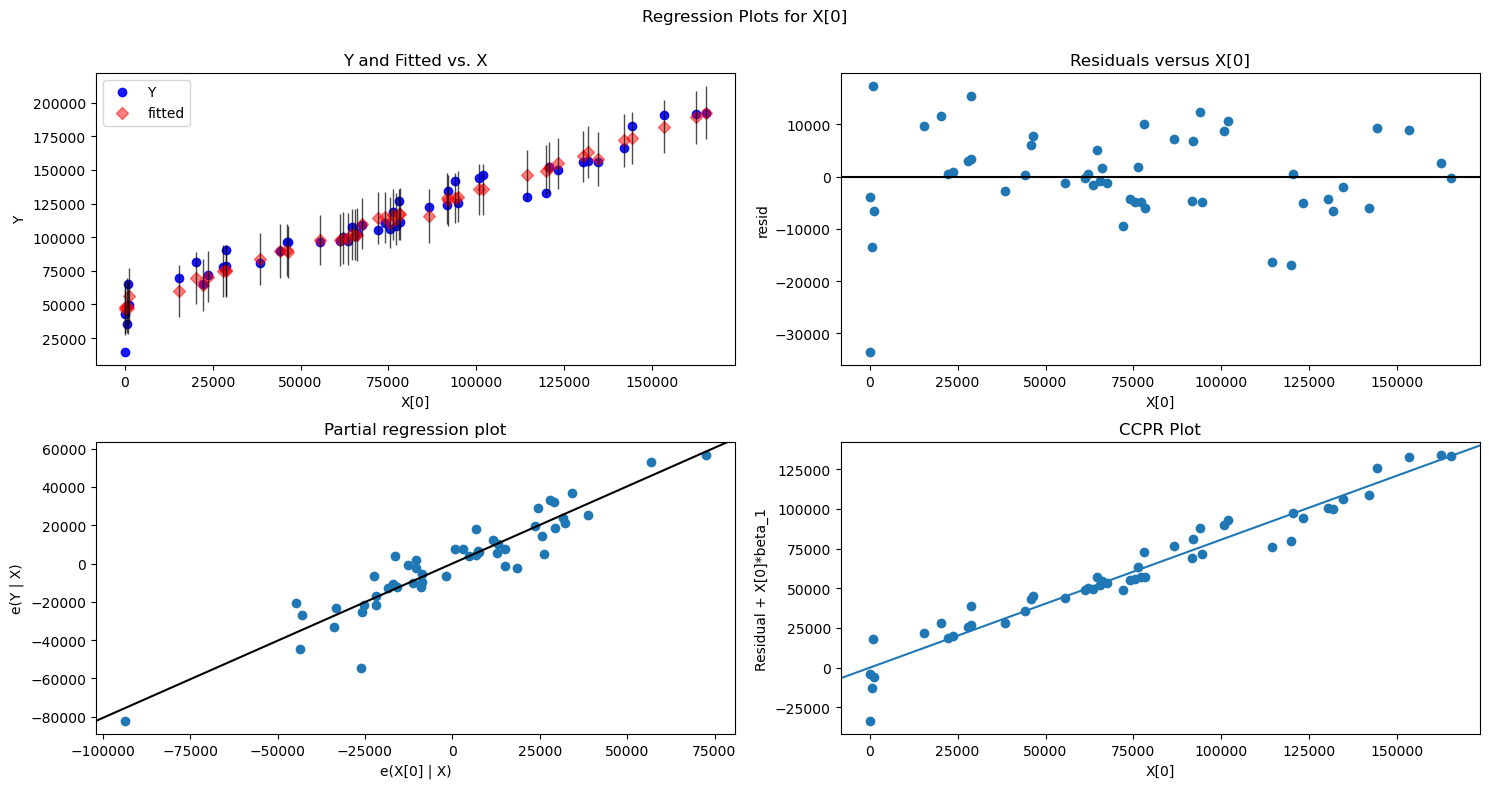

In [106]:
#R&D Spend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[0]",fig=fig)
plt.show()

eval_env: 1


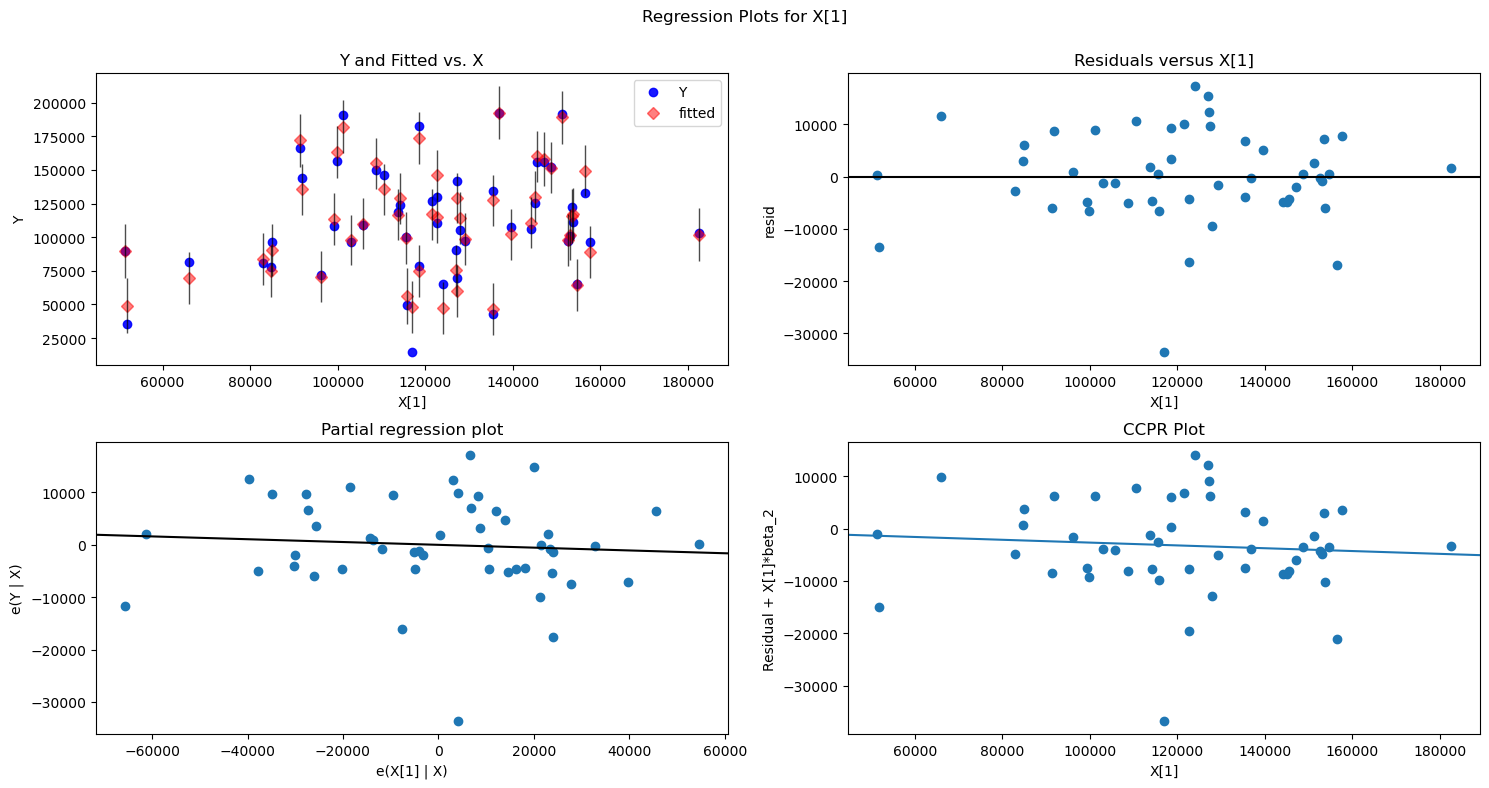

In [107]:
#Administration 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[1]",fig=fig)
plt.show()

eval_env: 1


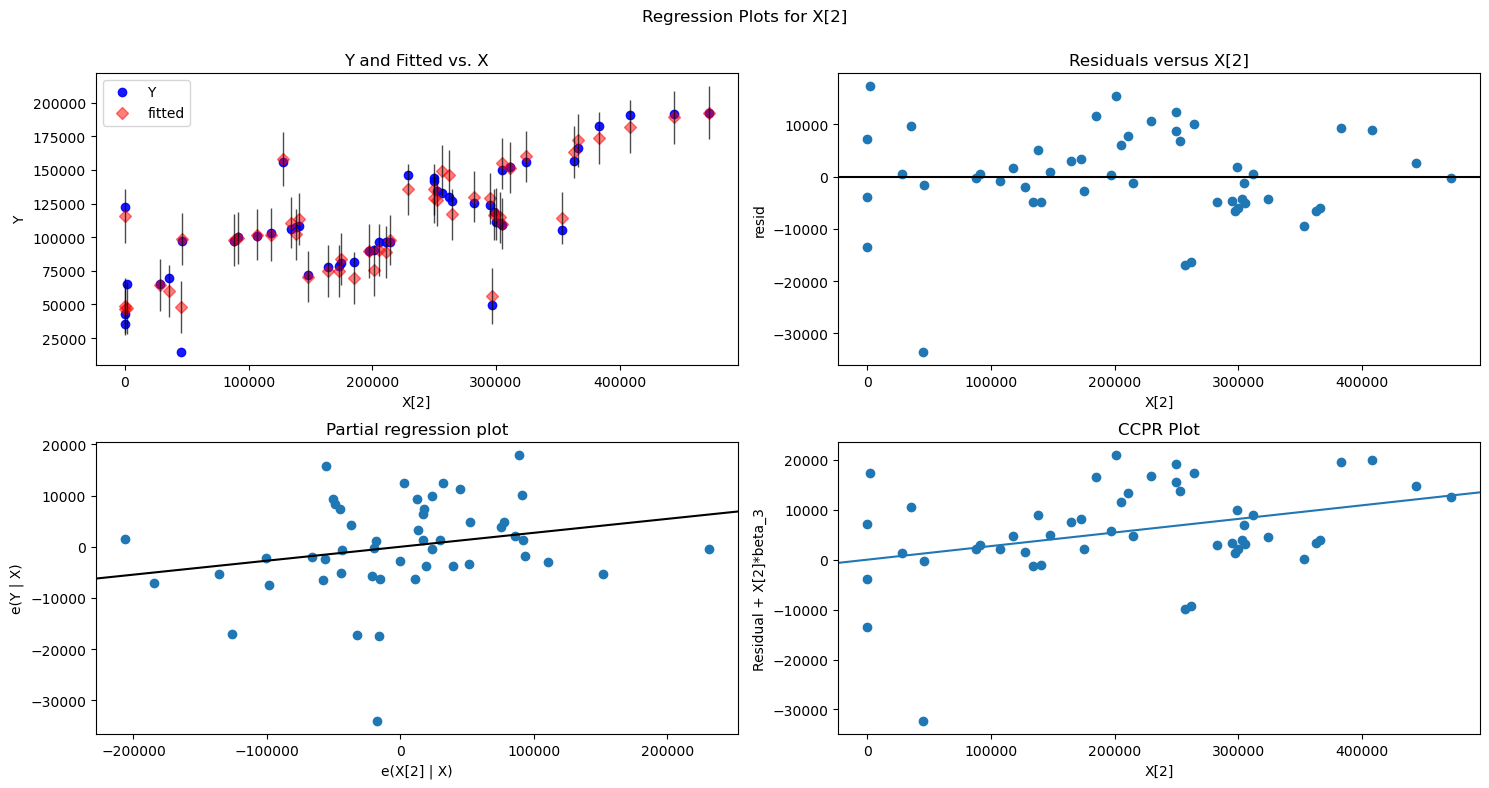

In [108]:
#Marketing Spend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"X[2]",fig=fig)
plt.show()

## We can infer that the input satisfy the assumptions, there is no pattern in Error vs input, Hence we can proceed to build the Linear model

## Identifying the Outliers/High Influence points

In [96]:
# Finding the High_Influence points

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

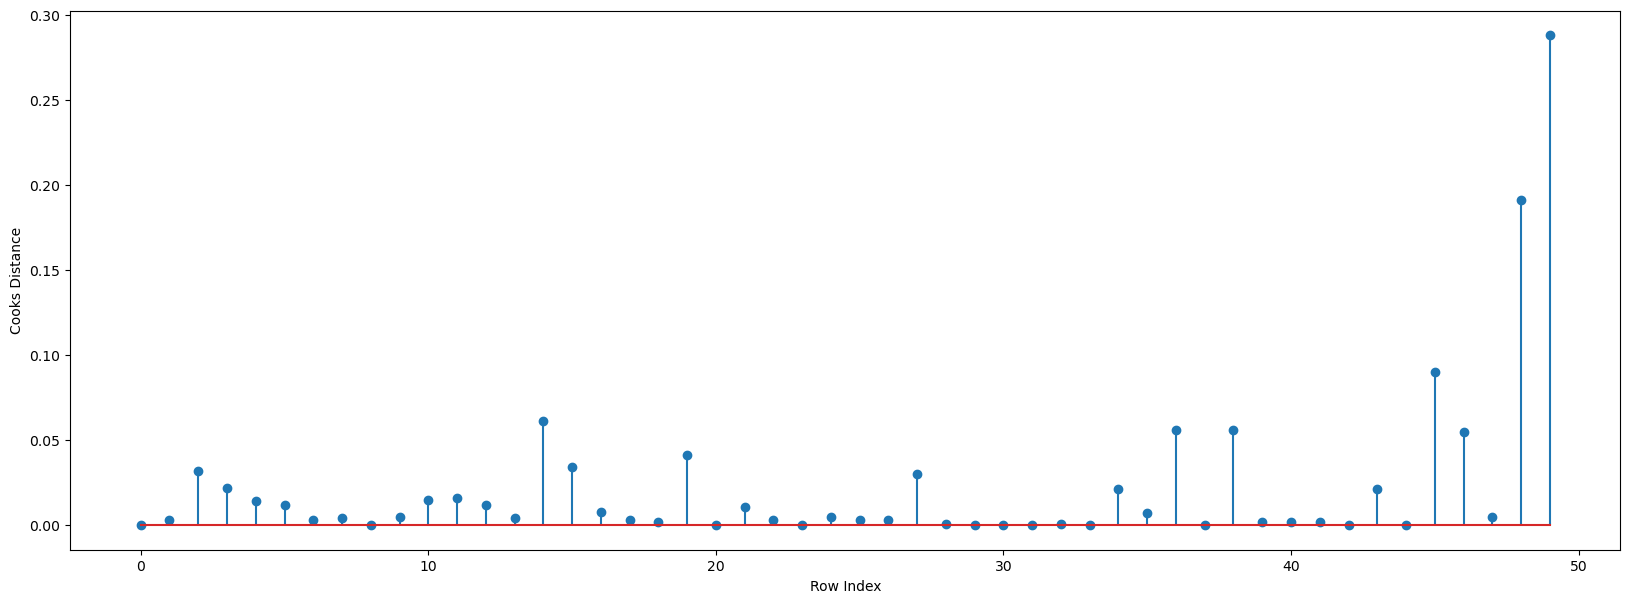

In [97]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize= (20,7))
plt.stem(np.arange(len(start)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# the Cooks distance is less than 1 hence no need to remove any datapoints, we can finalize the model

# There is one data point which is Outlier index 49, but our dataset is very small and the r2 score is also good ie 0.95 hence we can keep that datapoint.